<a href="https://colab.research.google.com/github/YamgoKES/Structured-Data-Machine-Learning-Modelling/blob/main/notebook/mini_project_v2_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from io import BytesIO
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
url = 'https://raw.githubusercontent.com/YamgoKES/Structured-Data-Machine-Learning-Modelling/refs/heads/main/new_gas.csv'

# 2. 요청해서 파일 가져오기
response = requests.get(url)
raw_data = response.content

# 3. 인코딩 감지
encoding = chardet.detect(raw_data)['encoding']

# 4. BytesIO로 메모리 내 가상 파일 생성 + 읽기
df = pd.read_csv(BytesIO(raw_data), encoding=encoding)

In [69]:
df.head(3)

,상호,상표,셀프여부,휘발유,경유,법정동명,month,공시지가(원/㎡),평균 공시지가(원/㎡),Dubai,14일 전 환율
0,(유)동하석유 힐탑셀프주유소,SK에너지,셀프,1737,1697,논현동,1,9670000.0,12473509.2,76.17,1294.7
1,(유)동하석유 힐탑셀프주유소,SK에너지,셀프,1737,1697,논현동,1,9670000.0,12473509.2,76.83,1298.7
2,(유)동하석유 힐탑셀프주유소,SK에너지,셀프,1737,1697,논현동,1,9670000.0,12473509.2,79.06,1304.7


칼럼 설명 <br>
상호 : 대리점 이름 <br>
상표 : 브랜드 이름 <br>
휘발유/경유 : 단위 리터당 가격(원) <br>
공시지가 : 법정동명 기준으로의 중앙값 <br>
평균 공시지가  : 말 그대로 법정동명기준으로의 평균 공시지가 <br>
Dubai : 두바이유 (2주전 데이터) <br>
14일 전 환율 : 반영시기가 2주전 정도이기 때문에 적용함 <br>

 독립변수  : 공시지가(0.45) , 셀프 , 법정동명 , month , Dubai, 14일전 환율 <br>
 종속변수 : 휘발유 가격

##전처리 및 시각화 과정

In [ ]:
############ 전처리전 시각화 보기 ########################

In [ ]:
############### 전처리 ################## 상관관계 ######################

In [ ]:
df['상표']=df['상표'].replace('알뜰(ex)', '알뜰주유소')

In [ ]:
# 휘발유가 0인값을 그 달의 평균값으로 채워넣기

zero_values=df['휘발유']==0 #df['휘발유'] != 0

month_avg=df[df['휘발유'] != 0].groupby('month')['휘발유'].mean() #0값을 제외한 월별 평균값

for idx in df[zero_values].index :
    month = df.loc[idx, 'month']
    df.loc[idx, '휘발유'] = month_avg[month]

<ipython-input-22-e4459580ca28>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1643.1348851709447' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[idx, '휘발유'] = month_avg[month]


In [ ]:
df[df==0].count()

,0
상호,0
상표,0
셀프여부,0
휘발유,0
경유,51
법정동명,0
month,0
공시지가(원/㎡),0
평균 공시지가(원/㎡),0
Dubai,0


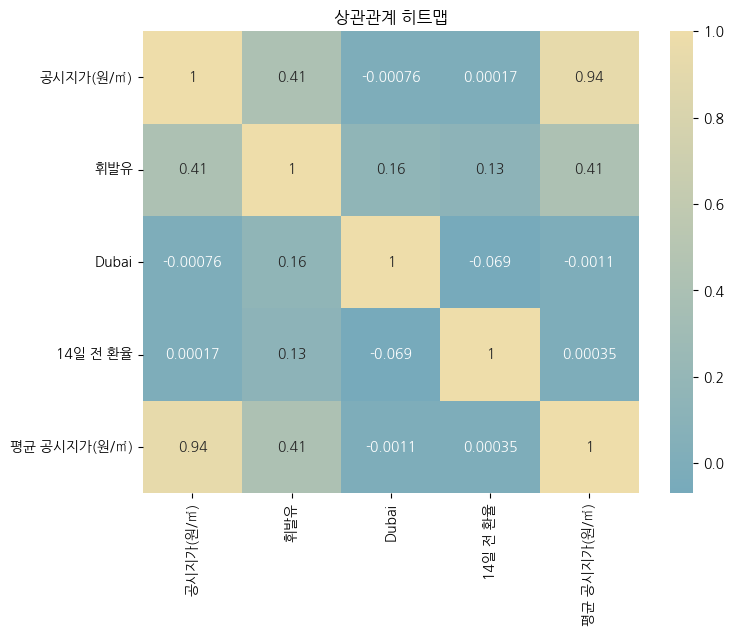

In [ ]:
heatmap_col = df[['공시지가(원/㎡)', '휘발유', 'Dubai', '14일 전 환율','평균 공시지가(원/㎡)']]
corr = heatmap_col.corr()

plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True, cmap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True))
plt.title('상관관계 히트맵')
plt.show()

Text(0.5, 1.0, '월별 휘발유가격 변동')

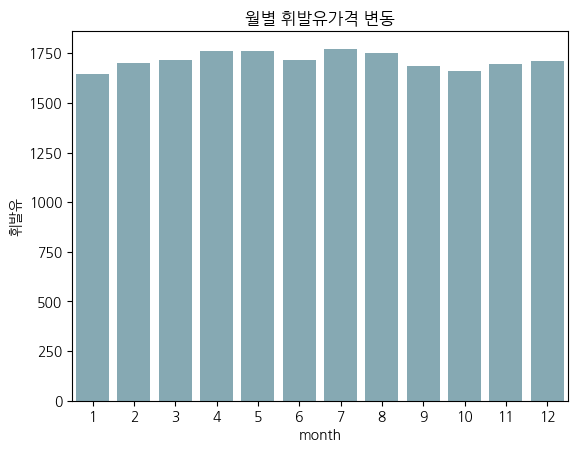

In [ ]:
sns.barplot(data=month_avg.reset_index(), x='month', y='휘발유',color='#7EADBA')
plt.title('월별 휘발유가격 변동')

Text(0.5, 1.0, '월별 환율 변동')

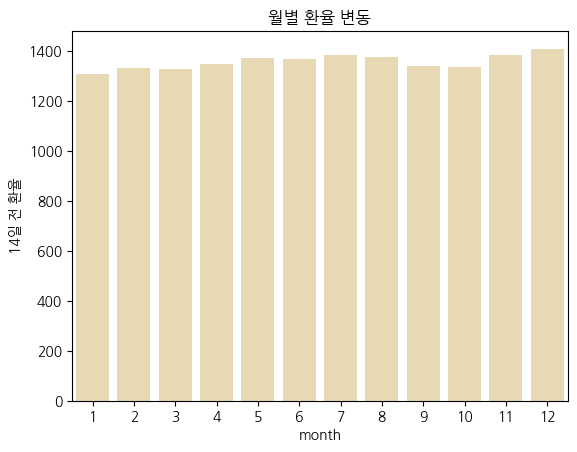

In [ ]:
dolloar_avg=df.groupby('month')['14일 전 환율'].mean()
sns.barplot(data=dolloar_avg.reset_index(),x='month',y='14일 전 환율', color='#EEDDAA')
plt.title('월별 환율 변동')

Text(0.5, 1.0, '월별 두바이유가 변동')

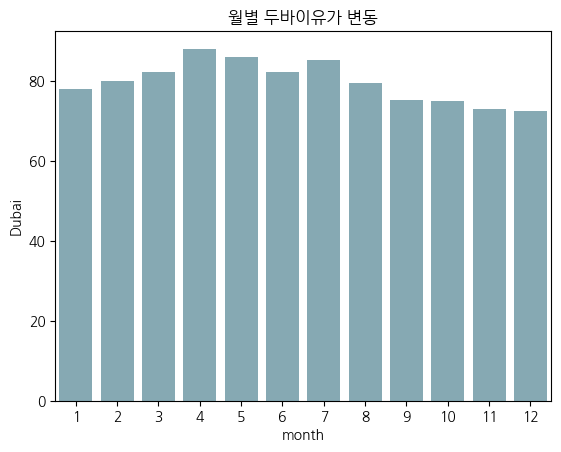

In [ ]:
dubai_avg=df.groupby('month')['Dubai'].mean()
sns.barplot(data=dubai_avg.reset_index(),x='month',y='Dubai', color='#7EADBA')
plt.title('월별 두바이유가 변동')

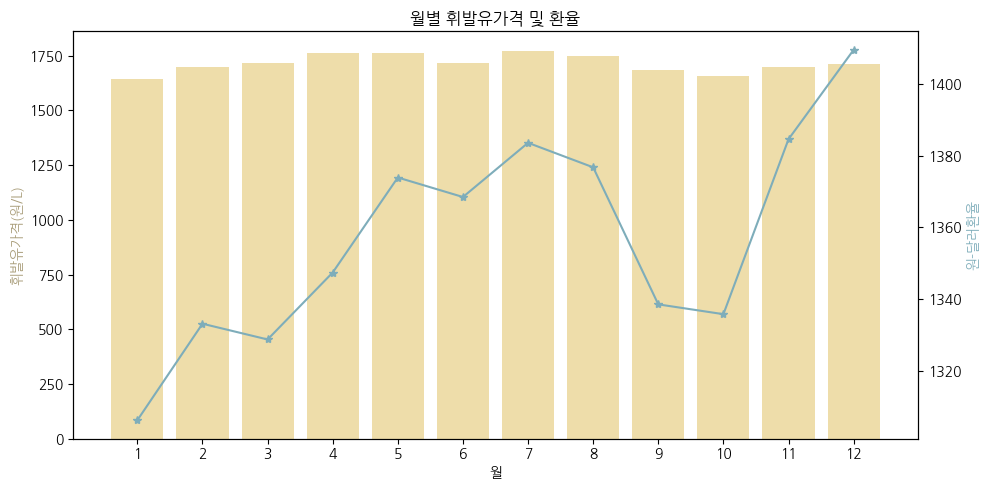

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(month_avg.index, month_avg.values, color='#EEDDAA', label='휘발유가격')
ax1.set_xlabel('월')
ax1.set_ylabel('휘발유가격(원/L)', color='#A89C78')
ax1.set_xticks(month_avg.index)
ax1.set_xticklabels(month_avg.index, rotation=0)  # 필요시 45로도 조정 가능

ax2 = ax1.twinx()
ax2.plot(dolloar_avg.index, dolloar_avg.values, color='#7EADBA', marker='*', label='환율')
ax2.set_ylabel('원-달러환율', color='#7EADBA')

plt.title('월별 휘발유가격 및 환율')
plt.tight_layout()

ax1.grid(False)
ax2.grid(False)

plt.show()

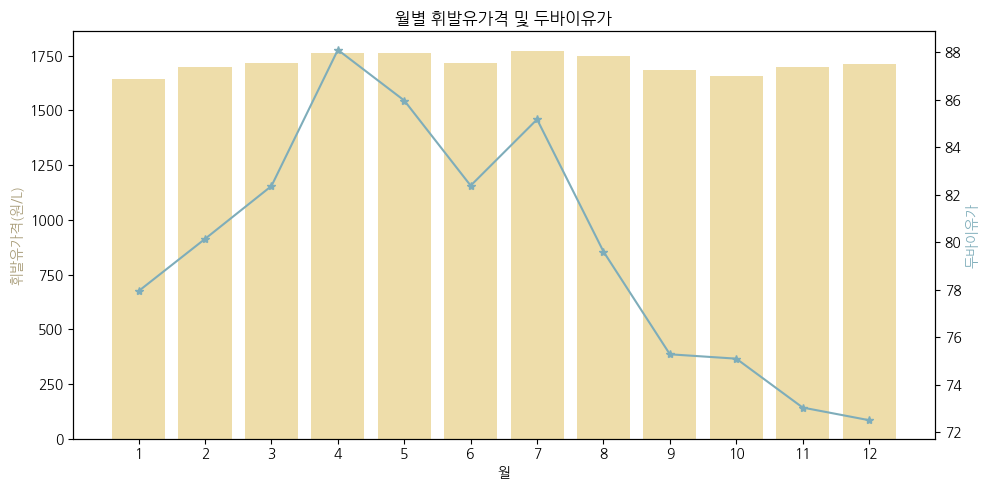

In [ ]:
f, a1 = plt.subplots(figsize=(10, 5))

a1.bar(month_avg.index, month_avg.values, color='#EEDDAA', label='휘발유가격')
a1.set_xlabel('월')
a1.set_ylabel('휘발유가격(원/L)', color='#A89C78')
a1.set_xticks(month_avg.index)
a1.set_xticklabels(month_avg.index, rotation=0)
a2 = a1.twinx()
a2.plot(dubai_avg.index, dubai_avg.values, color='#7EADBA', marker='*', label='두바이유가')
a2.set_ylabel('두바이유가', color='#7EADBA')

plt.title('월별 휘발유가격 및 두바이유가')
plt.tight_layout()

a1.grid(False)
a2.grid(False)

plt.show()

Text(0.5, 1.0, '셀프여부별 휘발유 가격 분포')

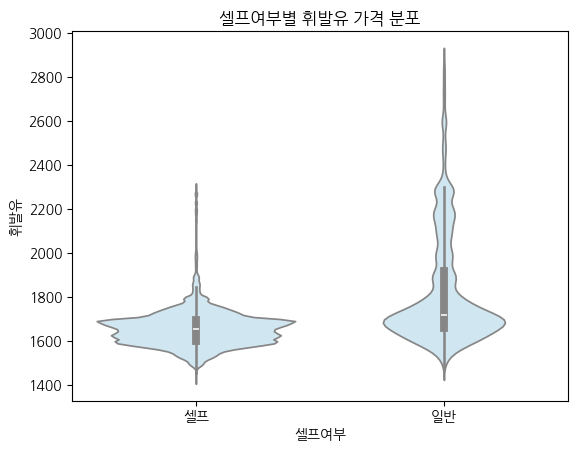

In [ ]:
sns.violinplot(data=df,x='셀프여부', y='휘발유', color='#CBE8F5')
plt.title('셀프여부별 휘발유 가격 분포')

Text(0.5, 1.0, '상표별 휘발유 가격 분포')

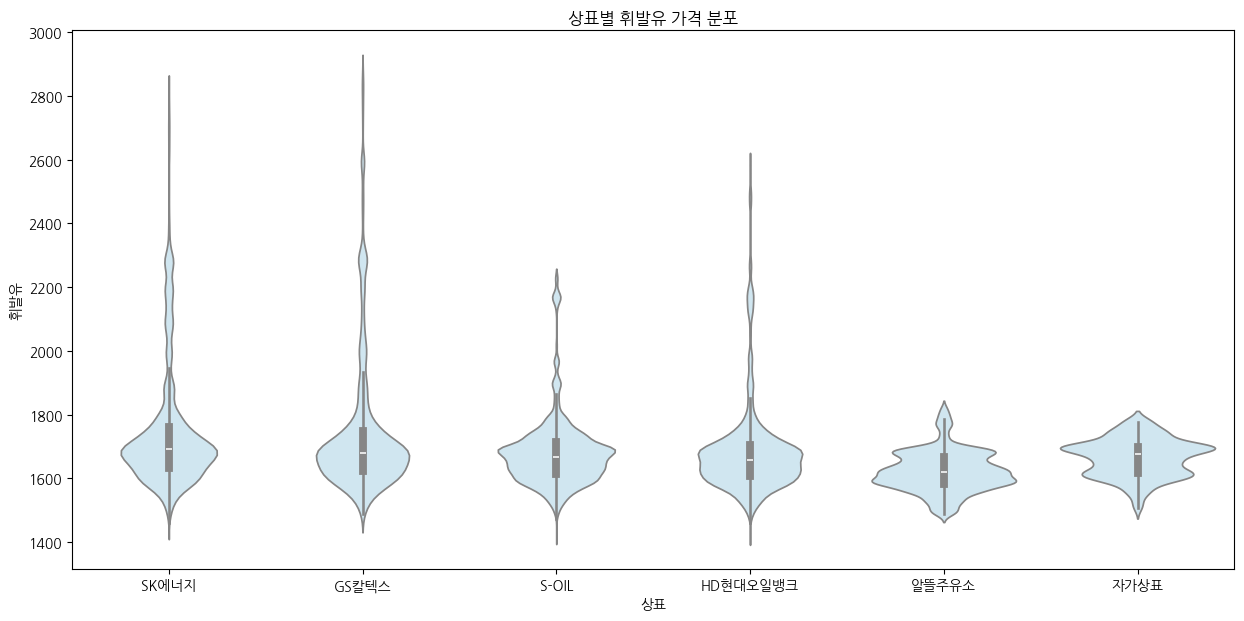

In [ ]:
fig = plt.figure(figsize=(15, 7))
sns.violinplot(data=df,x='상표', y='휘발유', color='#CBE8F5')
plt.title('상표별 휘발유 가격 분포')

##모델링 시작 <br>
독립 종속 나누기<br>
범주형 -> 원핫인코딩 <br>
train, test나누기 : 8:2 <br>
수치형 데이터 Standara스케일링



In [ ]:
#모델링 과정 시작

In [ ]:
#데이터 x, y 나누기

x=df.drop(columns=['상호','휘발유','경유','평균 공시지가(원/㎡)']) # 독립변수 설정
y=df['휘발유']

In [ ]:
#############

In [ ]:
#독립변수의 법주형 변수 원핫인코딩
x=pd.get_dummies(x, columns=['상표','셀프여부', '법정동명' ,'month'],drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#scaling standard scaling 적용예정
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
num_col=['공시지가(원/㎡)','Dubai', '14일 전 환율']
x_train[num_col]=scaler.fit_transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

#확인
print(x_train[num_col].head())

        공시지가(원/㎡)     Dubai  14일 전 환율
36611    1.283893  1.220348 -0.352830
85328   -0.262033 -1.072210  2.470971
53580   -0.281077  0.807800  0.689248
37934   -0.547702  0.323670 -0.773606
107682   3.675234 -0.049318  0.889774


##1. RandomForest Regression

In [ ]:
## 1. RandomForest Regression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest=RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    )

In [ ]:
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=200, random_state=42)

In [ ]:
pred_random_forest = random_forest.predict(x_test)

##Random Forest 평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

test_mse = mean_squared_error(y_test, pred_random_forest) # mse
test_r2 = r2_score(y_test, pred_random_forest) # r2
test_mae = mean_absolute_error(y_test, pred_random_forest) # mae


print(f'MAE_test : {test_mae : .2f}')
print(f'MSE_test: :{test_mse : .2f}')
print(f'R2_test : {test_r2 : .3f}')


MAE_test :  30.75
MSE_test: : 3682.96
R2_test :  0.885


In [ ]:
y_train_pred = random_forest.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'MSE_train: :{train_mse : .2f}')
print(f'R2_train : {train_r2 : .3f}')

print(f'MSE차이 : {test_mse-train_mse :.2f}')
print(f'R2 차이 : {train_r2-test_r2 : .3f}')

MSE_train: : 2598.62
R2_train :  0.920
MSE차이 : 1084.34
R2 차이 :  0.036


In [ ]:
data={
    '지표': ['MSE', 'R2'],
    'Train': [train_mse, train_r2],
    'Test': [test_mse, test_r2],
    '차이': [test_mse-train_mse,train_r2-test_r2]
}

df_metrics = pd.DataFrame(data)
df_metrics

,지표,Train,Test,차이
0,MSE,2598.618105,3682.961805,1084.343699
1,R2,0.920418,0.884564,0.035854


In [ ]:
feature_names = x_train.columns
importances = random_forest.feature_importances_

importance_df = pd.DataFrame({'변수': feature_names, '중요도': importances})

# '상표'로 시작하는 변수들만 모아서 중요도 합산
importance_df['그룹'] = importance_df['변수'].str.extract(r'(^[^_]+)')  # '상표_SK' → '상표'

grouped = importance_df.groupby('그룹')['중요도'].sum().sort_values(ascending=False)
print(grouped.head())

그룹
법정동명         0.359922
공시지가(원/㎡)    0.287907
셀프여부         0.203497
상표           0.069896
Dubai        0.041993
Name: 중요도, dtype: float64


<ipython-input-47-decd483ede19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped.values, y=grouped.index, palette='Blues_d')


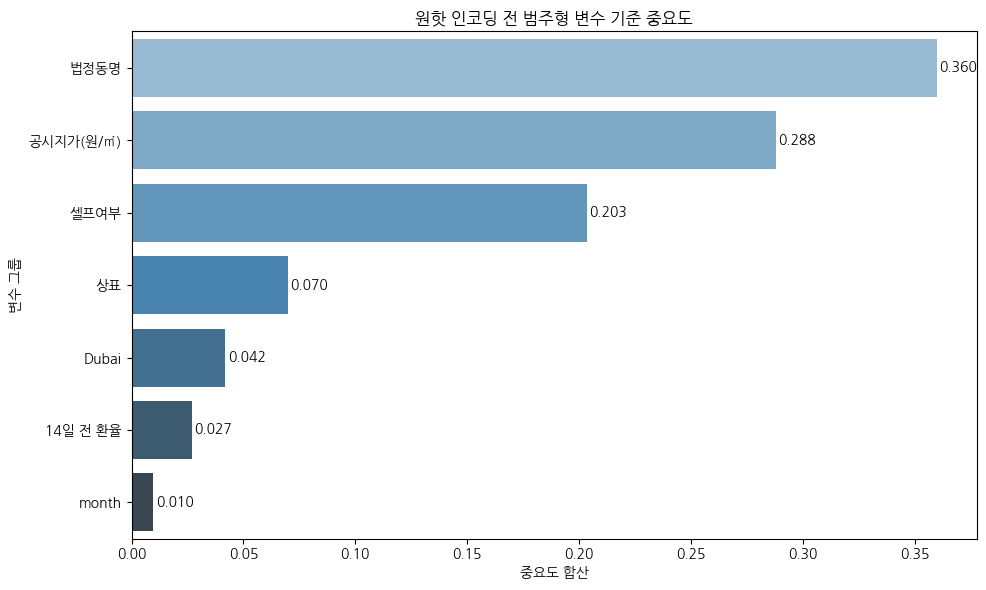

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=grouped.values, y=grouped.index, palette='Blues_d')

for i, value in enumerate(grouped.values):
    ax.text(value + 0.001, i, f'{value:.3f}', va='center', fontsize=10)

plt.title('원핫 인코딩 전 범주형 변수 기준 중요도')
plt.xlabel('중요도 합산')
plt.ylabel('변수 그룹')
plt.tight_layout()
plt.show()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression=LinearRegression(fit_intercept=False)
linear_regression.fit(x_train,y_train)


LinearRegression(fit_intercept=False)

In [ ]:
pred_linear_regression=linear_regression.predict(x_test)

## LinearRegression 평가

In [ ]:
test_mse_lr= mean_squared_error(y_test, pred_linear_regression)
test_mae_lr= mean_absolute_error(y_test, pred_linear_regression)
test_r2_lr=r2_score(y_test,pred_linear_regression)

print(f'MAE : {test_mae_lr : .2f}')
print(f'MSE: :{test_mse_lr : .2f}')
print(f'R2 : {test_r2_lr : .3f}')

y_train_pred_lr = linear_regression.predict(x_train)
train_mse_lr= mean_squared_error(y_train, y_train_pred_lr)
train_r2_lr=r2_score(y_train,y_train_pred_lr)

print(f'MSE: :{train_mse_lr : .2f}')
print(f'R2 : {train_r2_lr : .3f}')


print(f'MSE차이 : {test_mse_lr-train_mse_lr :.2f}')
print(f'R2 차이 : {train_r2_lr-test_r2_lr : .3f}')

MAE :  50.96
MSE: : 7413.73
R2 :  0.768
MSE: : 7429.94
R2 :  0.772
MSE차이 : -16.21
R2 차이 :  0.005


## XGBoost

In [ ]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(
    n_estimators=300,
    max_depth=10,
    learning_rate=0.1

)



In [ ]:
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred_xgboost=xgboost.predict(x_test)

##XGBoost평가

In [ ]:
test_mse_xg = mean_squared_error(y_test, pred_xgboost) # mse
test_r2_xg = r2_score(y_test, pred_xgboost) # r2
test_mae_xg = mean_absolute_error(y_test, pred_xgboost) # mae


print(f'MAE_test : {test_mae_xg : .2f}')
print(f'MSE_test: :{test_mse_xg : .2f}')
print(f'R2_test : {test_r2_xg : .3f}')

MAE_test :  22.91
MSE_test: : 2621.62
R2_test :  0.918


##기본 앙상블(평균)

In [ ]:
avg_pred = (pred_random_forest + pred_xgboost) / 2

##앙상블 평가

In [ ]:
test_avg_mse = mean_squared_error(y_test, avg_pred)
test_avg_mae = mean_absolute_error(y_test, avg_pred)
test_avg_r2= r2_score(y_test, avg_pred)

print(f'MAE_test: :{test_avg_mae : .2f}')
print(f'MSE_test : {test_avg_mse:.2f}')
print(f'R2_test  : {test_avg_r2:.3f}')


MAE_test: : 26.03
MSE_test : 2917.60
R2_test  : 0.909


In [ ]:
rf_pred_train = random_forest.predict(x_train)
xgb_pred_train = xgboost.predict(x_train)

# 평균
avg_pred_train = (rf_pred_train + xgb_pred_train) / 2

# 평가
train_avg_mae=mean_absolute_error(y_train,avg_pred_train)
train_avg_mse = mean_squared_error(y_train, avg_pred_train)
train_avg_r2 = r2_score(y_train, avg_pred_train)

print(f'MSE_train : {train_avg_mse:.2f}')
print(f'R2_train  : {train_avg_r2:.3f}')
print(f'MSE 차이  : {test_avg_mse - train_avg_mse:.2f}')
print(f'R2 차이   : {train_avg_r2 - test_avg_r2:.3f}')

MSE_train : 1928.66
R2_train  : 0.941
MSE 차이  : 988.94
R2 차이   : 0.032


##실제 예측해보기 간단 시뮬레션

In [ ]:
sel_cols = [col for col in x_train.columns if '셀프' in col]
print(sel_cols)

['셀프여부_일반']


In [ ]:
input_template = pd.DataFrame(columns=x_train.columns)

#예측용 입력값을 템플릿 복사
one_input = input_template.copy()
one_input.loc[0] = 0  # 모든 값 0으로 초기화

# 필요한 컬럼만 수동으로 설정
one_input.loc[0, '공시지가(원/㎡)'] = 3717000.0
one_input.loc[0, 'Dubai'] = 74.69
one_input.loc[0, '14일 전 환율'] = 1463.50
one_input.loc[0, '상표_알뜰주유소'] = 1
one_input.loc[0, '셀프여부_일반'] = 0
one_input.loc[0, '법정동명_신림동'] = 1
one_input.loc[0, 'month_4'] = 1

# 수치형 스케일링
num_cols = ['공시지가(원/㎡)', 'Dubai', '14일 전 환율']
one_input[num_cols] = scaler.transform(one_input[num_cols])

# 예측
pred = random_forest.predict(one_input)
print(f'예측 결과: {pred[0]:.2f} 원/L') #셀프: 1668 일반 : 1744 (도곡동) / 셀프 : 1655     일반 :1899.97

예측 결과: 1655.56 원/L


<ipython-input-59-333ce00adfa8>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.69' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  one_input.loc[0, 'Dubai'] = 74.69
<ipython-input-59-333ce00adfa8>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1463.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  one_input.loc[0, '14일 전 환율'] = 1463.50


In [ ]:
df.loc[(df['법정동명'] == '도곡동') & (df['month'] == 4),
       ['상표', '휘발유', '셀프여부', '공시지가(원/㎡)']]

,상표,휘발유,셀프여부,공시지가(원/㎡)
458,S-OIL,1759.0,일반,9105000.0
459,S-OIL,1759.0,일반,9105000.0
460,S-OIL,1759.0,일반,9105000.0
461,S-OIL,1759.0,일반,9105000.0
462,S-OIL,1798.0,일반,9105000.0
...,...,...,...,...
3198,SK에너지,1788.0,셀프,9105000.0
3199,SK에너지,1788.0,셀프,9105000.0
3200,SK에너지,1788.0,셀프,9105000.0
3201,SK에너지,1788.0,셀프,9105000.0


이렇게 봤을땐 <br>
셀프여부가 생각보다 모델을 돌리면 영향이 꽤 있다라는걸 알게됨.<br>

이 모델을 만들면서까지의 부족한점. <br>
@@1 데이터의 선택이 개인적으로는 좀 어려웠음 그 이유는 환율의날짜를 정하는과정 하나와 국제유가데이터의 날짜를 선정하는게 어려웠음 국제유가 반영시기가 이론상 2주에서 3주라는 정보를 얻었으나 문제는 이게 완벽하게 맞아 떨어지는 게 아니였기 때문에 좀 고려할게 많았음. <br>
@@2 데이터 수집의 어려움 : 사실 현재 변수가지고만 하기에는 모델이 정확히 예측하기 어려움 <br>
이유 : 기간데이터셋을 강제로 묶어 흐름이라는걸 제외함 이렇게 함으로 인해서 앞서말한 환율 및 국제유가 가격 반영에 약간의 어려움이 있었음 그래도 엄청 만족스러운 데이터셋이라고 생각함<br>
또한 공시지가 데이터를 법정동명 기준으로 설정을 하였어가지고 사실 그 주유소의 부지가격과 맞어 떨어지진 않음. 알뜰주유소가 또한 없는 지역이 더 많아 모델링에 돌릴때 예측의 오류가 좀 더 클거라고 봄

In [ ]:
#####################################################################################################

In [ ]:
one_input_xgboost = input_template.copy()
one_input_xgboost.loc[0] = 0  # 모든 값 0으로 초기화

# 필요한 컬럼만 수동으로 설정
one_input_xgboost.loc[0, '공시지가(원/㎡)'] =3717000.0
one_input_xgboost.loc[0, 'Dubai'] = 74.69
one_input_xgboost.loc[0, '14일 전 환율'] = 1463.50
one_input_xgboost.loc[0, '상표_알뜰주유소'] = 1
one_input_xgboost.loc[0, '셀프여부_일반'] = 0
one_input_xgboost.loc[0, '법정동명_신림동'] = 1
one_input_xgboost.loc[0, 'month_4'] = 1

# 수치형 스케일링
num_cols = ['공시지가(원/㎡)', 'Dubai', '14일 전 환율']
one_input_xgboost[num_cols] = scaler.transform(one_input_xgboost[num_cols])

# 예측
pred = xgboost.predict(one_input_xgboost)
print(f'예측 결과: {pred[0]:.2f} 원/L')

<ipython-input-62-546f17b9605c>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.69' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  one_input_xgboost.loc[0, 'Dubai'] = 74.69
<ipython-input-62-546f17b9605c>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1463.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  one_input_xgboost.loc[0, '14일 전 환율'] = 1463.50


예측 결과: 1668.51 원/L


In [ ]:
df.loc[(df['법정동명'] == '신림동') & (df['month'] == 4),
       ['상표', '휘발유', '셀프여부', '공시지가(원/㎡)']]

,상표,휘발유,셀프여부,공시지가(원/㎡)
11967,알뜰주유소,1639.0,셀프,3717000.0
11968,알뜰주유소,1649.0,셀프,3717000.0
11969,알뜰주유소,1659.0,셀프,3717000.0
11970,알뜰주유소,1665.0,셀프,3717000.0
11971,알뜰주유소,1675.0,셀프,3717000.0
...,...,...,...,...
13738,HD현대오일뱅크,1759.0,일반,3717000.0
13739,HD현대오일뱅크,1759.0,일반,3717000.0
13740,HD현대오일뱅크,1759.0,일반,3717000.0
13741,HD현대오일뱅크,1759.0,일반,3717000.0


In [ ]:
###############################################################################################

In [ ]:
one_input_avg = input_template.copy()
one_input_avg.loc[0] = 0  # 모든 값 0으로 초기화

# 필요한 컬럼만 수동으로 설정
one_input_avg.loc[0, '공시지가(원/㎡)'] =3717000.0
one_input_avg.loc[0, 'Dubai'] = 74.69
one_input_avg.loc[0, '14일 전 환율'] = 1463.50
one_input_avg.loc[0, '상표_알뜰주유소'] = 1
one_input_avg.loc[0, '셀프여부_일반'] = 0
one_input_avg.loc[0, '법정동명_신림동'] = 1
one_input_avg.loc[0, 'month_4'] = 1

# 수치형 스케일링
num_cols = ['공시지가(원/㎡)', 'Dubai', '14일 전 환율']
one_input_avg[num_cols] = scaler.transform(one_input_avg[num_cols])

pred_random_forest = random_forest.predict(one_input_avg)
pred_xgboost = xgboost.predict(one_input_avg)

# 평균 앙상블
ensemble_pred = (pred_random_forest + pred_xgboost) / 2

# 결과 출력
print(f'예측 결과 (평균 앙상블): {ensemble_pred[0]:.2f} 원/L')

<ipython-input-65-eee5922c537a>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.69' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  one_input_avg.loc[0, 'Dubai'] = 74.69
<ipython-input-65-eee5922c537a>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1463.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  one_input_avg.loc[0, '14일 전 환율'] = 1463.50


예측 결과 (평균 앙상블): 1662.03 원/L
